In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [3]:
df = pd.read_csv('titanic_data.csv')
df.head()

,Passenger,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22,7.2500,0,1,0,3,2,0
1,2,38,71.2833,1,1,0,1,0,1
2,3,26,7.9250,1,0,0,3,2,1
3,4,35,53.1000,1,1,0,1,2,1
4,5,35,8.0500,0,0,0,3,2,0


In [4]:
print('Shape:', df.shape)
print('Columns:', list(df.columns))
print('Data Types:')
print(df.dtypes)

Shape: (29, 9)
Columns: ['Passenger', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', 'Survived']
Data Types:
Passenger      int64
Age            int64
Fare         float64
Sex            int64
sibsp          int64
Parch          int64
Pclass         int64
Embarked       int64
Survived       int64
dtype: object


In [5]:
print('Missing values per column:')
print(df.isnull().sum())
percent_missing = (df.isnull().sum() / len(df)) * 100
print('\\nPercentage missing:')
percent_missing

Missing values per column:
Passenger    0
Age          0
Fare         0
Sex          0
sibsp        0
Parch        0
Pclass       0
Embarked     0
Survived     0
dtype: int64
\nPercentage missing:


,0
Passenger,0.0
Age,0.0
Fare,0.0
Sex,0.0
sibsp,0.0
Parch,0.0
Pclass,0.0
Embarked,0.0
Survived,0.0


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

/tmp/ipython-input-2496447948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2496447948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Passenger,0
Age,0
Fare,0
Sex,0
sibsp,0
Parch,0
Pclass,0
Embarked,0
Survived,0


In [7]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df.head()

,Passenger,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22,7.2500,0,1,0,3,2,0
1,2,38,71.2833,1,1,0,1,0,1
2,3,26,7.9250,1,0,0,3,2,1
3,4,35,53.1000,1,1,0,1,2,1
4,5,35,8.0500,0,0,0,3,2,0


In [8]:
df.describe()

,Passenger,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,29.000000
mean,15.000000,27.344828,29.554597,0.517241,0.724138,0.62069,2.413793,1.586207,0.517241
std,8.514693,14.492057,47.661067,0.508548,1.130630,1.34732,0.824502,0.732766,0.508548
min,1.000000,2.000000,7.225000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,8.000000,19.000000,8.050000,0.000000,0.000000,0.00000,2.000000,1.000000,0.000000
50%,15.000000,28.000000,16.700000,1.000000,0.000000,0.00000,3.000000,2.000000,1.000000
75%,22.000000,35.000000,30.070800,1.000000,1.000000,1.00000,3.000000,2.000000,1.000000
max,29.000000,58.000000,263.000000,1.000000,4.000000,5.00000,3.000000,2.000000,1.000000


In [9]:
df['Survived'].value_counts()


,count
Survived,
1,15
0,14


In [10]:
print('Survival by Gender:')
print(df.groupby('Sex')['Survived'].mean())
print('\\nSurvival by Class:')
print(df.groupby('Pclass')['Survived'].mean())
print('\\nSurvival by Embarked:')
print(df.groupby('Embarked')['Survived'].mean())

Survival by Gender:
Sex
0    0.214286
1    0.800000
Name: Survived, dtype: float64
\nSurvival by Class:
Pclass
1    0.666667
2    0.800000
3    0.388889
Name: Survived, dtype: float64
\nSurvival by Embarked:
Embarked
0    0.75000
1    0.50000
2    0.47619
Name: Survived, dtype: float64


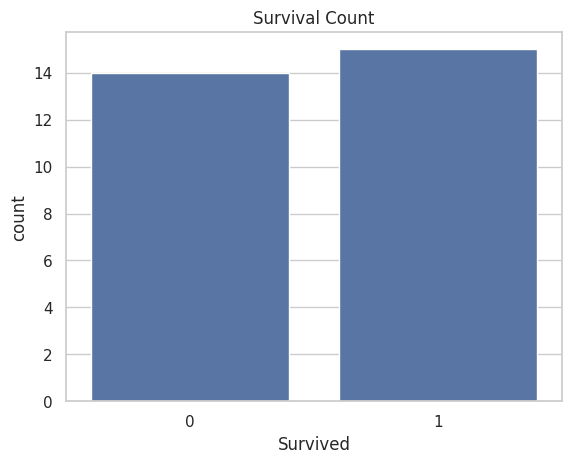

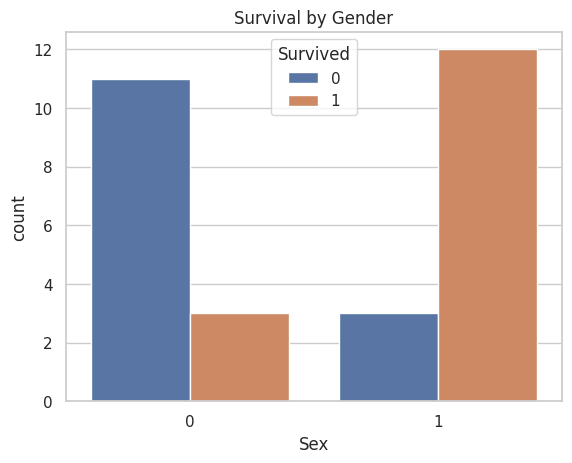

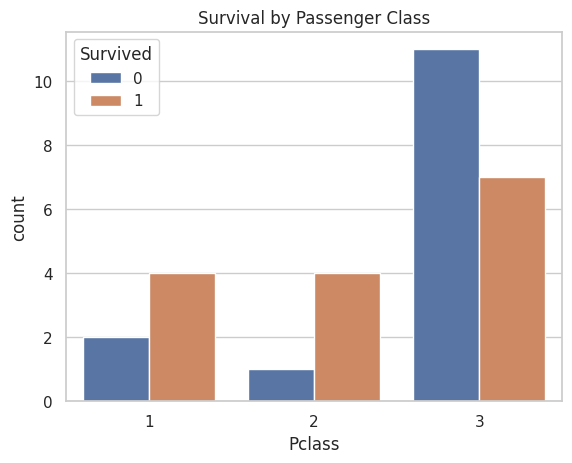

In [11]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

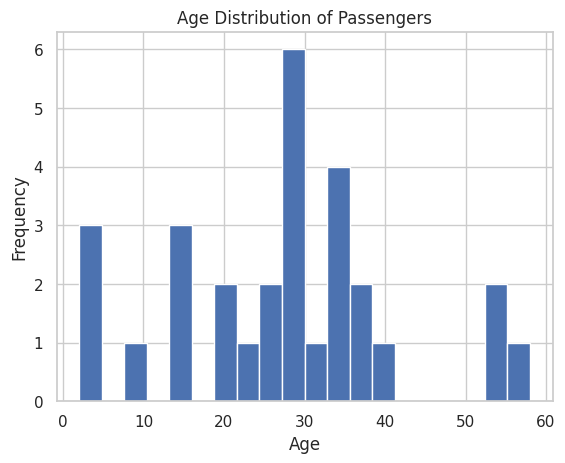

In [12]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Conclusion:-
This experiment demonstrated the core steps of a machine learning workflow, showing how models learn patterns from data to make effective predictions in real-world applications.
